# Module 1-3 Worksheet: Persistent Homology Pipelines

<font color = 'purple'>
    
*Once we are done talking through the slides from [the main module 1-3 notebook](1-3-PersistencePipelines.ipynb), we will take some time to test out your understanding of the definitions by working through the following questions. We encourage talking to your neighbor, and drawing pictures for understanding! Please ask if you need help!*
    
</font>


TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 

<font color = 'purple'><b>Question:</b></font>
My question goes here

*Space for your notes/answer*

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    
Hidden solution goes in here.     
</font>

## <font color = 'purple'>Take home message:</font>
- TODO

## Challenge problem

If you have a ton of time left, here's a challenge problem to think about. 

TODO 

<font color = 'purple'><b>Question:</b></font>
What is the homology for the 

*Space for your notes/answer*

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    
Hidden solution goes in here.     
</font>

## <font color = 'purple'>Take home message:</font>
- TODO

## Cubical Practice Example

Just run the codes

In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import CubicalPersistence
from gtda.diagrams import Filtering

In [22]:
X1, X2 = np.mgrid[1:9, 1:11]
Density = np.array([np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), np.array([1, 3, 3, 3, 3, 3, 6, 6, 6, 1]), np.array([1, 3, 5, 5, 4, 4, 6, 4, 6, 1]), np.array([1, 3, 5, 5, 4, 4, 6, 4, 6, 1]), np.array([1, 3, 3, 3, 3, 3, 6, 6, 6, 1]), np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), np.array([1, 3, 3, 1, 1, 1, 2, 1, 1, 1]), np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])])
print(Density)

[[1 1 1 1 1 1 1 1 1 1]
 [1 3 3 3 3 3 6 6 6 1]
 [1 3 5 5 4 4 6 4 6 1]
 [1 3 5 5 4 4 6 4 6 1]
 [1 3 3 3 3 3 6 6 6 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 3 3 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


<IPython.core.display.Javascript object>


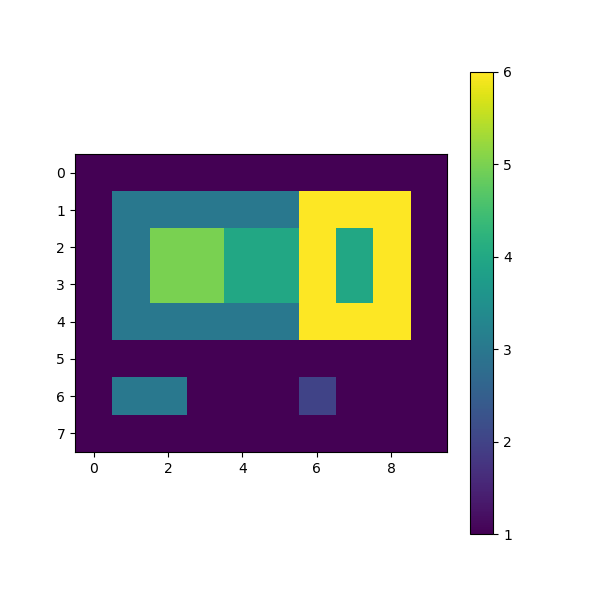

In [28]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(Density)
plt.colorbar()

In [29]:
# Find Cubical Persistence

Density = np.array([Density])
cubical_persistence = CubicalPersistence(n_jobs=-1, reduced_homology=False)
Persistence = cubical_persistence.fit_transform(Density)

filtered = Filtering(epsilon=10 ** -2)
Filtered_Persistence = filtered.fit_transform(Persistence)
plot = filtered.plot(Filtered_Persistence)
plot.show()